<a href="https://colab.research.google.com/github/edada2018/Big-Data-Analysis---Standard-CNN-and-Bagging-Learning-CNN/blob/main/E_Data_CNN_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Title: Convolutional Neural Networks (CNN) Based Bagging Learning for Image Classification  on CIFAR 100


## Set up the environment

### Install necessary Libraries

In [ ]:
!pip install tensorflow
!pip install matplotlib
!pip install --upgrade jax jaxlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 MB 25.5 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.33
    Uninstalling jaxlib-0.4.33:
      Successfully uninstalled jaxlib-0.4.33
  Attempting uninstall: jax
    Found existing installation: jax 0.4.33
    Uninstalling jax-0.4.33:
      Successfully uninstalled jax-0.4.33


In [ ]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import time

Data Loading and Preprocessing

In [ ]:
# Load and preprocess the CIFAR-100 dataset
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load CIFAR-100 dataset
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Visualize CIFAR100 Dataset

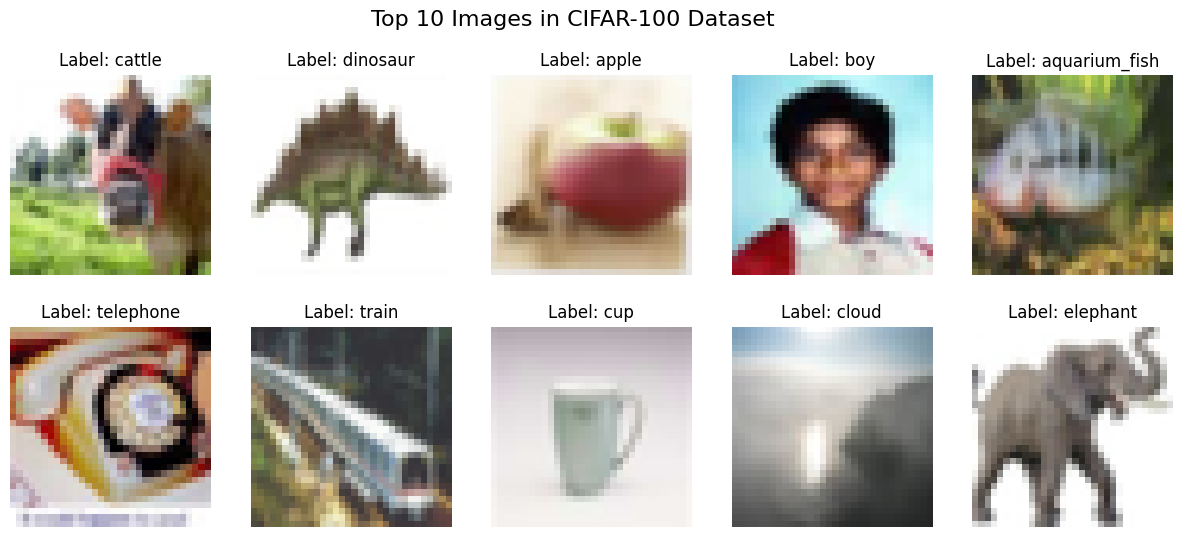

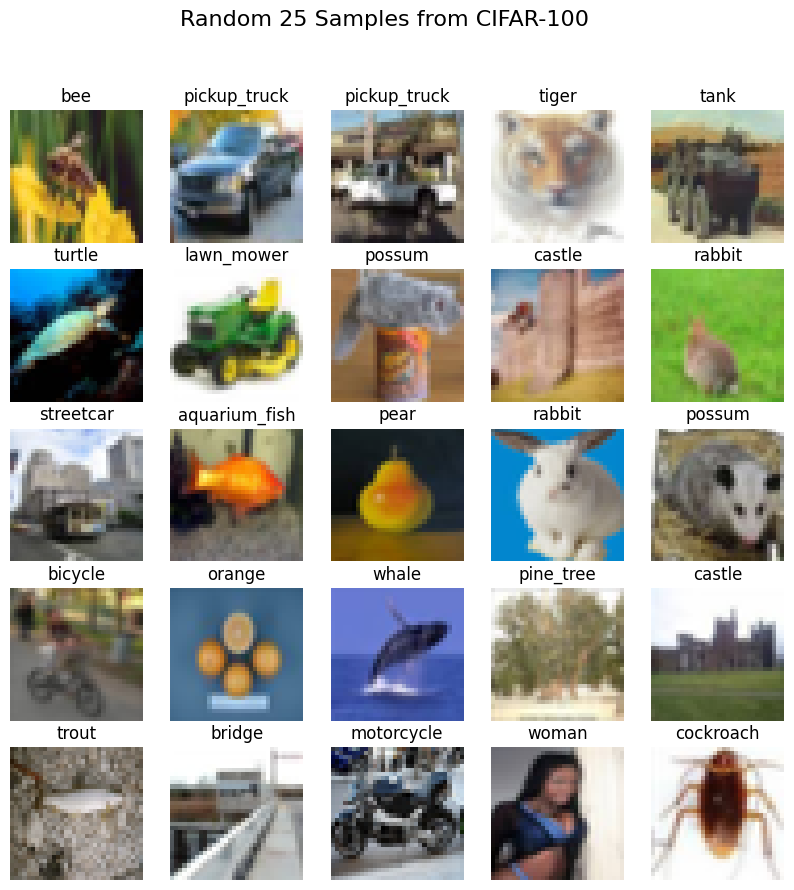

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-100 dataset
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Class labels in CIFAR-100
class_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Function to visualize top 10 images
def show_top_10_images():
    plt.figure(figsize=(15, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_train_full[i])
        plt.title(f"Label: {class_labels[y_train_full[i][0]]}")
        plt.axis('off')
    plt.suptitle("Top 10 Images in CIFAR-100 Dataset", fontsize=16)
    plt.show()

# Function to visualize random samples
def show_random_samples(x_data, y_data, num_samples=25):
    indices = np.random.choice(len(x_data), num_samples, replace=False)
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(indices):
        plt.subplot(5, 5, i + 1)
        plt.imshow(x_data[idx])
        plt.title(class_labels[y_data[idx][0]])
        plt.axis('off')
    plt.suptitle(f"Random {num_samples} Samples from CIFAR-100", fontsize=16)
    plt.show()

# Display top 10 images
show_top_10_images()

# Display random 25 samples
show_random_samples(x_train_full, y_train_full)

In [ ]:
# Normalize images to range [0, 1]
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train_full = to_categorical(y_train_full, 100)
y_test = to_categorical(y_test, 100)


In [ ]:
# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.1, random_state=42
)

# Print dataset sizes for verification
print(f"Training set size: {x_train.shape[0]} images")
print(f"Validation set size: {x_val.shape[0]} images")
print(f"Testing set size: {x_test.shape[0]} images")


Training set size: 45000 images
Validation set size: 5000 images
Testing set size: 10000 images


 Define the CNN model architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the CNN model architecture
def create_model():
    model = Sequential([
        # First block
        Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        BatchNormalization(),  # Batch Normalization added
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),

        # Second block
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),

        # Third block
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),

        # Dense layers
        Flatten(),
        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),  # Increased dropout rate
        Dense(100, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [ ]:
# Create and compile the model
standard_cnn = create_model()

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history_standard = standard_cnn.fit(
    datagen.flow(x_train, y_train, batch_size=32), # Reduced batch size
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[reduce_lr],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.0579 - loss: 4.9399 - val_accuracy: 0.1616 - val_loss: 3.6789 - learning_rate: 0.0010
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.1574 - loss: 3.7803 - val_accuracy: 0.2344 - val_loss: 3.5306 - learning_rate: 0.0010
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.2243 - loss: 3.2164 - val_accuracy: 0.3012 - val_loss: 2.8117 - learning_rate: 0.0010
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.2884 - loss: 2.8393 - val_accuracy: 0.3222 - val_loss: 2.7252 - learning_rate: 0.0010
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.3403 - loss: 2.5614 - val_accuracy: 0.3936 - val_loss: 2.3145 - learning_rate: 0.0010
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.3716 - loss: 2.4066 - val_accuracy: 0.4460 - val_loss: 2.0342 - learning_rate: 0.0010
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0

In [ ]:
# Step 5: Train the standard CNN
standard_cnn = create_model()

history_standard = standard_cnn.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)


Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.0684 - loss: 4.8582 - val_accuracy: 0.1324 - val_loss: 3.9913
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1948 - loss: 3.4796 - val_accuracy: 0.2682 - val_loss: 2.9610
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3026 - loss: 2.7850 - val_accuracy: 0.3576 - val_loss: 2.5429
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3765 - loss: 2.4097 - val_accuracy: 0.4456 - val_loss: 2.0804
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4233 - loss: 2.1690 - val_accuracy: 0.4446 - val_loss: 2.0819
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4658 - loss: 1.9625 - val_accuracy: 0.4512 - val_loss: 2.0399
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5080 - loss: 1.7748 - val_accuracy: 0.4758 - val_loss: 1.9555
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5432 - loss: 

In [ ]:
# Step 6: Implement Bagging CNN
from sklearn.utils import resample

def train_bagging_models(num_models, x_train, y_train):
    models = []
    # Store history for each model
    histories = []
    for i in range(num_models):
        # Resample data with replacement
        x_resampled, y_resampled = resample(x_train, y_train)
        model = create_model()
        # Fit and store the history, including validation_split
        history = model.fit(x_resampled, y_resampled, epochs=100, batch_size=32, verbose=1, validation_split=0.2)  # Add validation_split
        models.append(model)
        histories.append(history)
    return models, histories # Return both models and histories

# Train 5 bagging models
bagging_models, bagging_histories = train_bagging_models(5, x_train, y_train) # Get both outputs

Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.0634 - loss: 4.9129 - val_accuracy: 0.1354 - val_loss: 3.8369
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1797 - loss: 3.6160 - val_accuracy: 0.2610 - val_loss: 3.0968
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2820 - loss: 2.9250 - val_accuracy: 0.3466 - val_loss: 2.6316
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3683 - loss: 2.4661 - val_accuracy: 0.4353 - val_loss: 2.1656
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4358 - loss: 2.1255 - val_accuracy: 0.5068 - val_loss: 1.8893
Epoch 6/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4976 - loss: 1.8719 - val_accuracy: 0.5136 - val_loss: 1.8340
Epoch 7/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5453 - loss: 1.6601 - val_accuracy: 0.5660 - val_loss: 1.6390
Epoch 8/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5861 - loss: 

Bagging Model 1 Test Accuracy: 0.5231
Bagging Model 2 Test Accuracy: 0.5206
Bagging Model 3 Test Accuracy: 0.5193
Bagging Model 4 Test Accuracy: 0.5190
Bagging Model 5 Test Accuracy: 0.5289

Standard CNN Test Accuracy: 0.6072999835014343
Bagging CNN Mean Test Accuracy: 0.5221800088882447


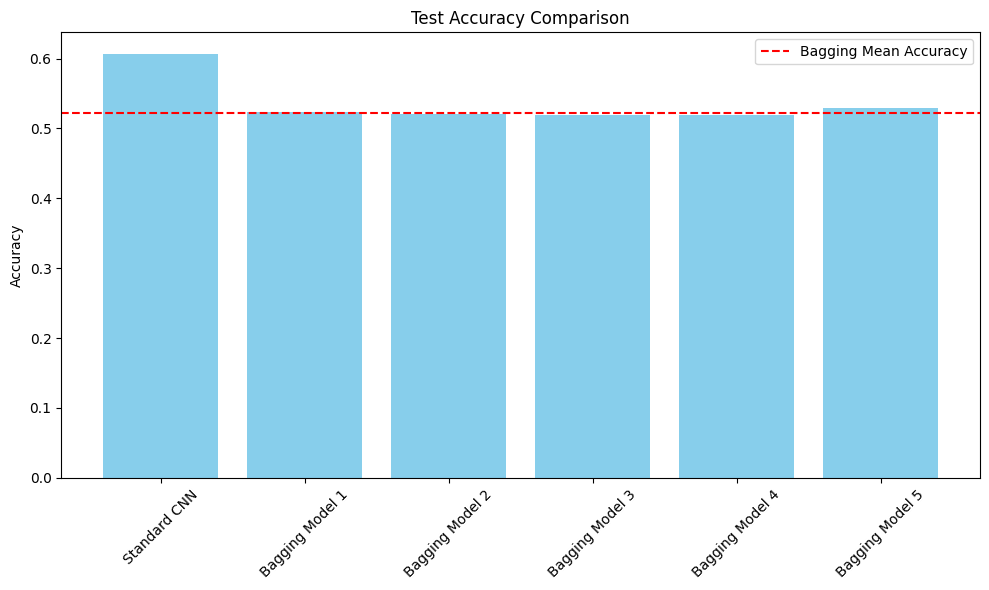

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Step 7: Test and evaluate models
# Evaluate Standard CNN
standard_cnn_eval = standard_cnn.evaluate(x_test, y_test, verbose=0)
standard_cnn_accuracy = standard_cnn_eval[1]

# Evaluate Bagging CNN
bagging_accuracies = []
for i, model in enumerate(bagging_models):
    acc = model.evaluate(x_test, y_test, verbose=0)[1]
    print(f"Bagging Model {i+1} Test Accuracy: {acc:.4f}")
    bagging_accuracies.append(acc)

# Calculate mean accuracy for Bagging CNN
bagging_mean_accuracy = np.mean(bagging_accuracies)

# Print results
print("\nStandard CNN Test Accuracy:", standard_cnn_accuracy)
print("Bagging CNN Mean Test Accuracy:", bagging_mean_accuracy)

# Plot comparison
models = ['Standard CNN'] + [f'Bagging Model {i+1}' for i in range(len(bagging_models))]
accuracies = [standard_cnn_accuracy] + bagging_accuracies

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.axhline(bagging_mean_accuracy, color='red', linestyle='--', label='Bagging Mean Accuracy')
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Soft voting: Average predictions of all bagging models
def bagging_predict(models, x_test):
    predictions = [model.predict(x_test) for model in models]
    avg_predictions = np.mean(predictions, axis=0)  # Average probabilities
    return np.argmax(avg_predictions, axis=1)

# Evaluate Bagging CNN
bagging_predictions = bagging_predict(bagging_models, x_test)
bagging_test_acc = np.mean(bagging_predictions == np.argmax(y_test, axis=1))
print(f"Bagging CNN Test Accuracy: {bagging_test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Bagging CNN Test Accuracy: 0.61


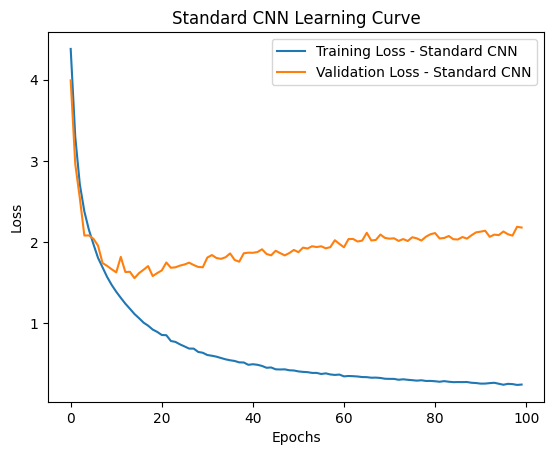

In [ ]:
# Step 8: Plot learning curves
# Standard CNN learning curve
plt.plot(history_standard.history['loss'], label='Training Loss - Standard CNN')
plt.plot(history_standard.history['val_loss'], label='Validation Loss - Standard CNN')
plt.title('Standard CNN Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Step 9: Bagging CNN learning curves

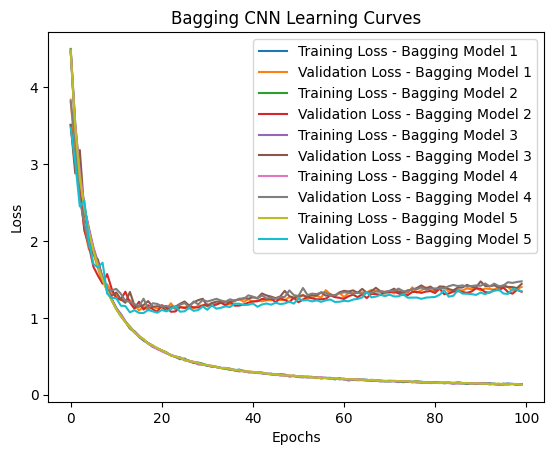

In [ ]:
# Bagging CNN learning curves
for i, (model, history) in enumerate(zip(bagging_models, bagging_histories)): # Iterate using zip
    plt.plot(history.history['loss'], label=f'Training Loss - Bagging Model {i+1}')
    plt.plot(history.history['val_loss'], label=f'Validation Loss - Bagging Model {i+1}')
plt.title('Bagging CNN Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

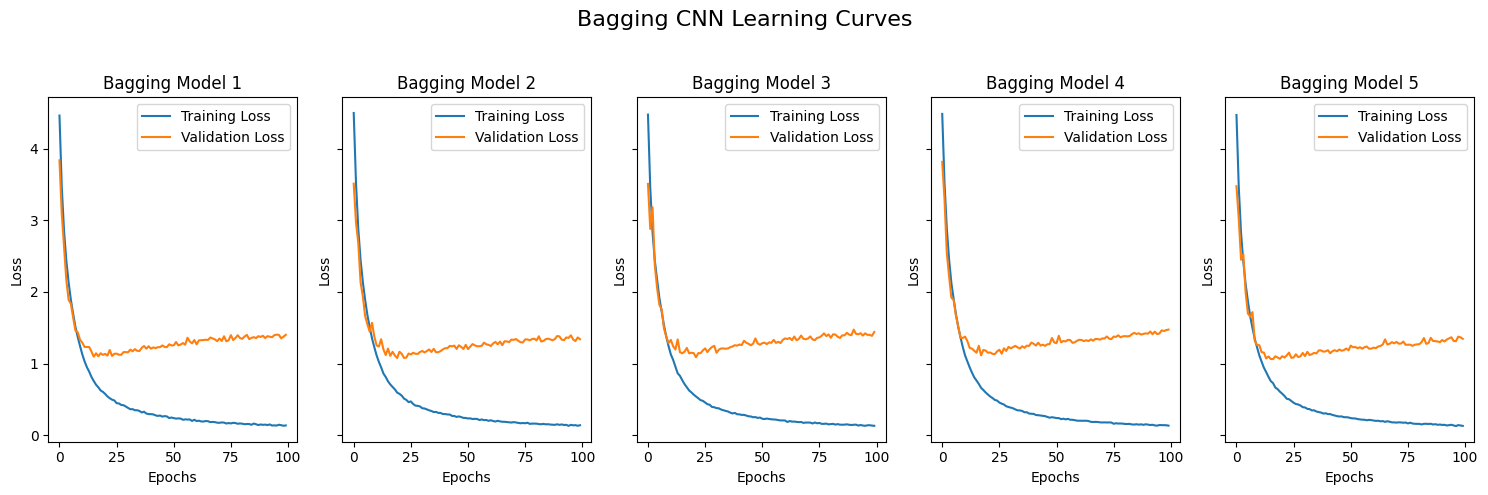

In [ ]:
import matplotlib.pyplot as plt

# Adjusted code for side-by-side comparison
fig, axes = plt.subplots(1, len(bagging_histories), figsize=(15, 5), sharey=True)

for i, (model, history) in enumerate(zip(bagging_models, bagging_histories)):
    axes[i].plot(history.history['loss'], label='Training Loss')
    axes[i].plot(history.history['val_loss'], label='Validation Loss')
    axes[i].set_title(f'Bagging Model {i+1}')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Loss')
    axes[i].legend()

plt.suptitle('Bagging CNN Learning Curves', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()
